Realizado por: Valentina Rodriguez Hernandez

In [ ]:
#librerias
import numpy as np
from scipy import integrate
import scipy.optimize as optimize
import pandas as pd
import matplotlib.pylab as plt
from scipy import misc
import datetime as dt
# Código derivate
def derivate(func,x0,**kwargs):
    '''
    Vectorized replacement of scipy.misc derivative:
        from scipy.misc import derivative
    For usage check the derivative help, e.g, in jupyter: 
        from scipy.misc import derivative
        derivative?
    '''
    try:
        #x0: can be an array or a list  
        nn=np.asarray(x0).shape[0] # force error if float is used 
        fp=np.vectorize(misc.derivative)
    except IndexError:
        fp=misc.derivative
        
    return fp(func,x0,**kwargs)

A) Los siguientes datos fueron extraidos de un [perfil real de Instragram](https://www.instagram.com/paulacano24/):

https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/data/Followers.json

Interprete los datos como un problema de caida libre y a partir del ajuste (fit) a la correspondiente ecuación de movimiento, determine
1. La velocidad inicial de incremento de seguidores en `followers/hour`
1. La aceleración constante en `followers/hour**2`
1. El número máximo de seguidores que alcanzaría el perfil
1. La fecha en la que se alcanzaría dicho máximo



No handles with labels found to put in legend.


la funcion de la inerpolacion es:            2
-0.002438 x + 8.552 x + 4.276e+04


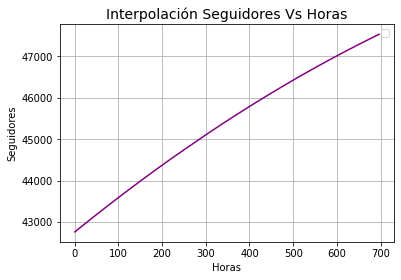

In [ ]:
#1
df = pd.read_json("https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/data/Followers.json")#leer el link con json
#generar las variables a interpolar
X = df['hours']
Y = df['followers']
#Hallando la interpolacion
coefs = np.polyfit(X,Y,2)
pol = np.poly1d(coefs)

print("la funcion de la inerpolacion es:", pol)
#graficando la interpolacion
plt.plot(X,pol(X), color="purple")
plt.title('Interpolación Seguidores Vs Horas',size=14)
plt.ylabel('Seguidores')
plt.xlabel('Horas')
plt.grid()
plt.legend()
plt.show()

In [ ]:
#1
veli = derivate(pol, X[0])
print("La velocidad inicial es: ", veli, "[followers/hour]")

La velocidad inicial es:  8.552137792663416 [followers/hour]


In [ ]:
#2
aceleracion = derivate(pol, X[0], n=2, order=3)
print("La aceleración es: ", aceleracion/2,"[followers/hour**2]")

La aceleración es:  -0.0024376271903747693 [followers/hour**2]


In [ ]:
#3
fp=optimize.fmin_powell(-pol , 0.1,  ftol=1E-7 )
Max=int(abs(pol(fp)))
print("El número máximo de seguidores que alcanzaría el perfil es: ",Max)

Optimization terminated successfully.
         Current function value: -50262.136729
         Iterations: 2
         Function evaluations: 27
El número máximo de seguidores que alcanzaría el perfil es:  50262


In [ ]:
#4
z= float(fp)
fecha2= df['date_time'][0]+dt.timedelta(hours= z)
print("la fecha del máximo de seguidores es el: {}".format(fecha2))

la fecha del máximo de seguidores es el: 2021-10-17 00:18:28.966848


B) El período de  un pendulo de longitud $l$ oscilando a ángulos grandes  $\alpha$, está dado por
$$
T=T_{0} \frac{\sqrt{2}}{\pi} \int_{0}^{\alpha} \frac{d \theta}{(\cos \theta-\cos \alpha)^{\frac{1}{2}}}
$$
donde
$$
T_{0}=2 \pi \sqrt{\frac{l}{g}}
$$
es el período del mismo péndulo a pequeñas amplitudes. Culquier intento de evaluación numérico de esa integral debería fallar. Sin embargo, si hacemos el cambio de variable
$$
\sin \frac{\theta}{2}=\sin \frac{\alpha}{2} \sin \phi
$$
obtenemos
$$
T=\frac{2 T_{0}}{\pi} \int_{0}^{\frac{\pi}{2}} \frac{d \phi}{\left(1-\sin ^{2} \frac{\alpha}{2} \sin ^{2} \phi\right)^{\frac{1}{2}}}
$$
que corresponde a una integral bien comportada. 
1. Escriba un programa que use la anterio integral para calcular el cociente  $T/T_0$ para ángulos enteros (en grados) $0^\circ \le\alpha \le 90^\circ$.  
1. Genere un DataFrame de pandas que contenga como columnas: la amplitud en grados, la amplitud en radianes, y el cociente $T/T_0$, 
1. Haga un gráfico de $T/T_0$ como función de $\alpha$ (en grados). 
1. Explain the result when $\alpha = 0.$ 

$$
\frac{T}{T_{0}} = \frac{2 }{\pi} \int_{0}^{\frac{\pi}{2}} \frac{d \phi}{\left(1-\sin ^{2} \frac{\alpha}{2} \sin ^{2} \phi\right)^{\frac{1}{2}}}
$$

In [ ]:
#1
y = lambda α: integrate.quad(lambda ϕ:1/np.sqrt(1-np.sin(α/2)**2*np.sin(ϕ)**2),0,np.pi/2)[0] #resolviendo la integral con el metodo de la cuadratura 
def Y(x):#Vectorizando la funcion 
    try:
        nn=np.array(x).shape[0]
        f=np.vectorize(y)
    except IndexError:
        f=y
    return f(x)*2/np.pi
X = np.linspace(0,np.pi/2,100)
Y(X)

array([1.        , 1.00001573, 1.00006294, 1.00014163, 1.00025181,
       1.0003935 , 1.00056673, 1.00077153, 1.00100793, 1.00127597,
       1.00157571, 1.00190719, 1.00227047, 1.00266561, 1.00309268,
       1.00355177, 1.00404293, 1.00456628, 1.00512189, 1.00570986,
       1.0063303 , 1.00698332, 1.00766903, 1.00838755, 1.00913901,
       1.00992355, 1.01074131, 1.01159243, 1.01247707, 1.01339538,
       1.01434753, 1.0153337 , 1.01635406, 1.0174088 , 1.01849811,
       1.0196222 , 1.02078127, 1.02197553, 1.02320522, 1.02447055,
       1.02577177, 1.02710911, 1.02848285, 1.02989323, 1.03134052,
       1.03282501, 1.03434697, 1.03590671, 1.03750453, 1.03914074,
       1.04081567, 1.04252964, 1.04428299, 1.04607609, 1.04790929,
       1.04978296, 1.05169749, 1.05365326, 1.05565069, 1.05769018,
       1.05977217, 1.0618971 , 1.06406541, 1.06627758, 1.06853407,
       1.07083538, 1.07318201, 1.07557448, 1.07801332, 1.08049907,
       1.08303231, 1.0856136 , 1.08824354, 1.09092274, 1.09365

In [ ]:
#2
dft = pd.DataFrame({'α grados':X*180/np.pi, 'α radianes ':X,'T/T0':Y(X)}) #generando el dataframe
dft

,α grados,α radianes,T/T0
0,0.000000,0.000000,1.000000
1,0.909091,0.015867,1.000016
2,1.818182,0.031733,1.000063
3,2.727273,0.047600,1.000142
4,3.636364,0.063467,1.000252
...,...,...,...
95,86.363636,1.507330,1.163806
96,87.272727,1.523196,1.167832
97,88.181818,1.539063,1.171930
98,89.090909,1.554930,1.176099


No handles with labels found to put in legend.


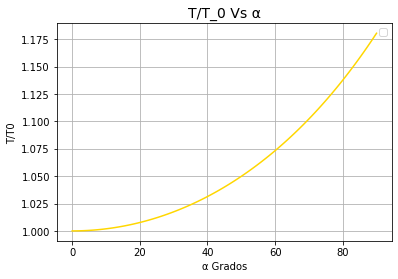

In [ ]:
#3 
#graficando T/T_0 Vs α
plt.plot(dft['α grados'],dft['T/T0'], color="gold")
plt.title('T/T_0 Vs α',size=14)
plt.ylabel('T/T0')
plt.xlabel('α Grados')
plt.grid()
plt.legend()
plt.show()

4
Cuando $\alpha$ tiende a $0$, de tal manera que la amplitud es cada vez más pequeña y por lo tanto el periodo se aproxima al periodo del pendulo a amplitudes pequeñas $T$ tiende a $T_0$, asi mismo: 
$$
\frac{T}{T_0} = 1
$$